In [1]:
import pandas as pd

df = pd.read_csv('../data/consolidated_results.csv')
features = ['total_filters', 'kernel_size', 'input_size', 'tpu_mode', 'usb_type', 'block_type', 'filters_per_layer', 'number_of_layers', 'total_power_avg']
X_power = df[features]
X_power

total_filters  kernel_size  input_size tpu_mode usb_type block_type  \
0             26624            1        9216      std     usb2   fullconv   
1             40960            1        9216      std     usb2   fullconv   
2             31744            1        9216      std     usb2   fullconv   
3             44288            1        9216      std     usb2   fullconv   
4             61568            1        9216      std     usb2   fullconv   
...             ...          ...         ...      ...      ...        ...   
2613             50            3      192000      max     usb3  separable   
2614             50            3      256000      max     usb3  separable   
2615             50            3      384000      max     usb3  separable   
2616             50            3      512000      max     usb3  separable   
2617             50            3      640000      max     usb3  separable   

      filters_per_layer  number_of_layers  total_power_avg  
0                  1024                26         4.295750  
1                  1024                40         4.230833  
2                   128               248         6.067273  
3                   128               346         6.260636  
4                   128               481         6.198545  
...                 ...               ...              ...  
2613                 10                 5         6.237500  
2614                 10                 5         5.879167  
2615                 10                 5         6.258439  
2616                 10                 5         6.367769  
2617                 10                 5         6.361647  

[2618 rows x 9 columns]

In [2]:
from pycaret.regression import *
power_models = setup(data = X_power, target = 'total_power_avg', session_id = "42")

In [3]:
best_power_models = power_models.compare_models(sort="MAE")

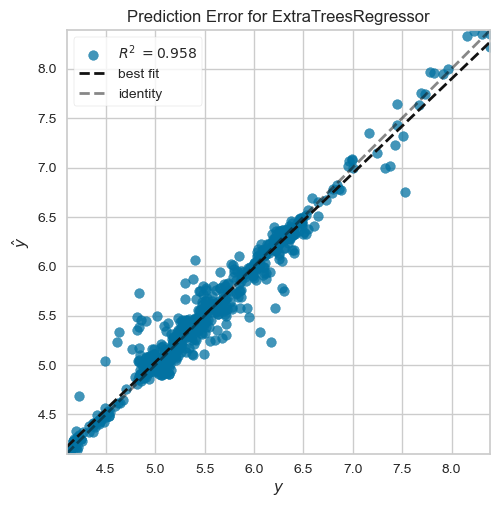

In [4]:
plot_model(best_power_models, plot = 'error')

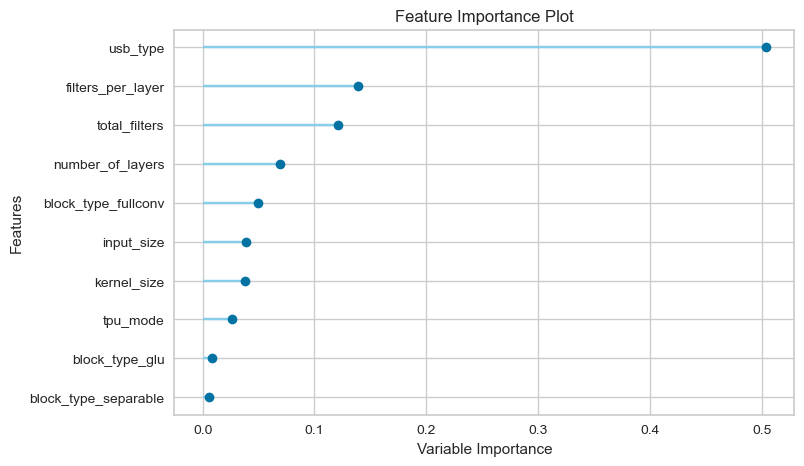

In [5]:
plot_model(best_power_models, plot = 'feature')

In [6]:
tuned_power_model = tune_model(best_power_models, n_iter = 50)
evaluate_model(tuned_power_model)
final_power_model = finalize_model(tuned_power_model)
save_model(final_power_model, '../models/power_model')

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['total_filters', 'kernel_size',
                                              'input_size', 'filters_per_layer',
                                              'number_of_layers'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['tpu_mode', 'usb_type',
                                              'block_type'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': max    0
 std    1
 NaN   -1
 dtype: int64},
                                                                         {'col': 'usb_type',
                  

In [7]:
features = ['total_filters', 'kernel_size', 'input_size', 'tpu_mode', 'usb_type', 'block_type', 'filters_per_layer', 'number_of_layers', 'inference_time_per_input']
X_inference = df[features]
X_inference

total_filters  kernel_size  input_size tpu_mode usb_type block_type  \
0             26624            1        9216      std     usb2   fullconv   
1             40960            1        9216      std     usb2   fullconv   
2             31744            1        9216      std     usb2   fullconv   
3             44288            1        9216      std     usb2   fullconv   
4             61568            1        9216      std     usb2   fullconv   
...             ...          ...         ...      ...      ...        ...   
2613             50            3      192000      max     usb3  separable   
2614             50            3      256000      max     usb3  separable   
2615             50            3      384000      max     usb3  separable   
2616             50            3      512000      max     usb3  separable   
2617             50            3      640000      max     usb3  separable   

      filters_per_layer  number_of_layers  inference_time_per_input  
0                  1024                26                  5.453409  
1                  1024                40                  9.393047  
2                   128               248                  0.050065  
3                   128               346                  0.067698  
4                   128               481                  0.096414  
...                 ...               ...                       ...  
2613                 10                 5                  0.025000  
2614                 10                 5                  0.035000  
2615                 10                 5                  0.055000  
2616                 10                 5                  0.070000  
2617                 10                 5                  0.090000  

[2618 rows x 9 columns]

In [8]:
from pycaret.regression import *
inference_models = setup(data = X_inference, target = 'inference_time_per_input', session_id = "42")

In [9]:
best_inference_models = inference_models.compare_models(sort="MAE")

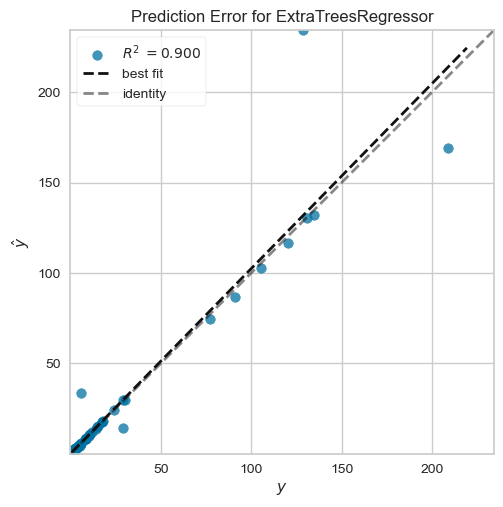

In [10]:
plot_model(best_inference_models, plot = 'error')

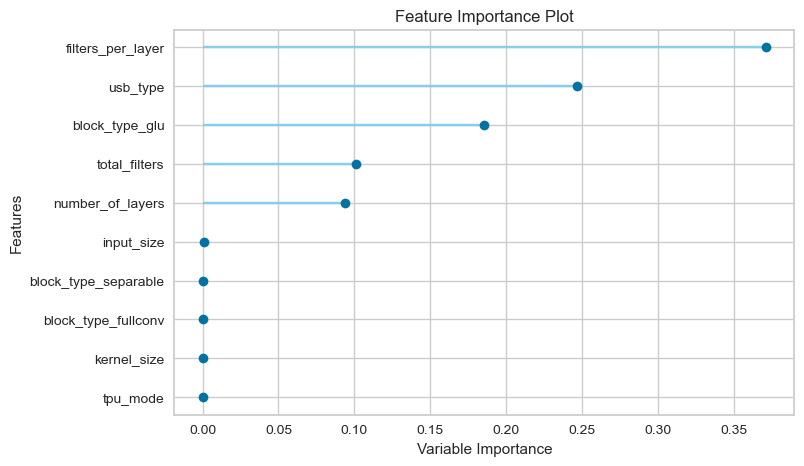

In [11]:
plot_model(best_inference_models, plot = 'feature')

In [12]:
tuned_inference_model = tune_model(best_inference_models, n_iter = 50)
evaluate_model(tuned_inference_model)
final_inference_model = finalize_model(tuned_inference_model)
save_model(final_inference_model, '../models/inference_model')

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['total_filters', 'kernel_size',
                                              'input_size', 'filters_per_layer',
                                              'number_of_layers'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['tpu_mode', 'usb_type',
                                              'block_type'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': max    0
 std    1
 NaN   -1
 dtype: int64},
                                                                         {'col': 'usb_type',
                  

In [13]:
# Create a DataFrame with the extracted data
data = {
    'Features': ['TPU Mode', 'Kernel Size', 'Fullconv (Block Type)', 'Separable (Block Type)', 'Input Size', '# Layers', 'Filters', 'GLU (Block Type)', 'USB Type', 'Filters per Layer'],
    'Variable Importance': [0.03, 0.04, 0.05, 0.003, 0.04, 0.07, 0.12, 0.01, 0.51, 0.14]
}
df0 = pd.DataFrame(data)
df0["Model"] = "Power"

data = {
    'Features': ['TPU Mode', 'Kernel Size', 'Fullconv (Block Type)', 'Separable (Block Type)', 
                 'Input Size', '# Layers', 'Filters', 'GLU (Block Type)', 
                 'USB Type', 'Filters per Layer'],
    'Variable Importance': [0.003, 0.003, 0.003, 0.003, 0.003, 0.09, 0.10, 0.18, 0.25, 0.37]
}

df1 = pd.DataFrame(data)
df1["Model"] = "Inference Time"

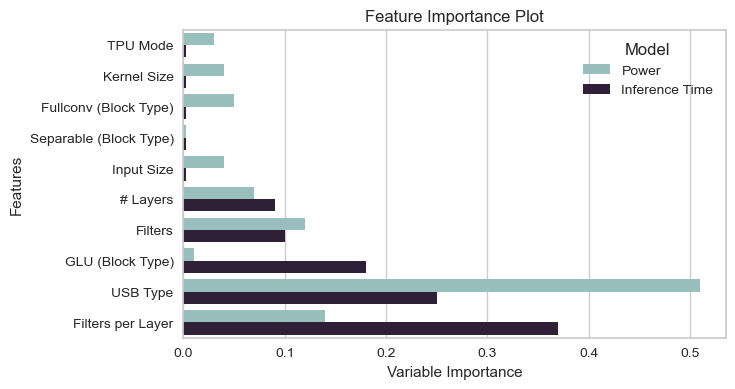

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt

palette_ = sns.cubehelix_palette(start=.5, rot=-.5)

plt.figure(figsize=(7, 4))
bar_plot = sns.barplot(data=pd.concat([df0,df1]), x="Variable Importance", y="Features", hue="Model", palette=[palette_[1], palette_[-1]])

bar_plot.set_title('Feature Importance Plot')
bar_plot.set_xlabel('Variable Importance')
bar_plot.set_ylabel('Features')
bar_plot.figure.savefig("../output/feature_importance.png")